In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1841 entries, 0 to 1840
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            1841 non-null   object 
 1   Gender             1802 non-null   object 
 2   Married            1832 non-null   object 
 3   Dependents         1796 non-null   object 
 4   Education          1841 non-null   object 
 5   Self_Employed      1745 non-null   object 
 6   ApplicantIncome    1841 non-null   int64  
 7   CoapplicantIncome  1841 non-null   float64
 8   LoanAmount         1775 non-null   float64
 9   Loan_Amount_Term   1799 non-null   float64
 10  Credit_History     1691 non-null   float64
 11  Property_Area      1841 non-null   object 
 12  Loan_Status        1841 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 187.1+ KB


In [6]:
data.shape

(1841, 13)

In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,1841.000000,1841.000000,1775.000000,1799.000000,1691.000000
mean,5403.904943,1622.126431,146.419718,341.989994,0.842697
std,6107.351415,2925.208792,85.562606,65.100913,0.364194
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2876.000000,0.000000,100.000000,360.000000,1.000000
50%,3812.000000,1210.000000,128.000000,360.000000,1.000000
75%,5800.000000,2302.000000,168.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


<AxesSubplot:xlabel='Gender', ylabel='count'>

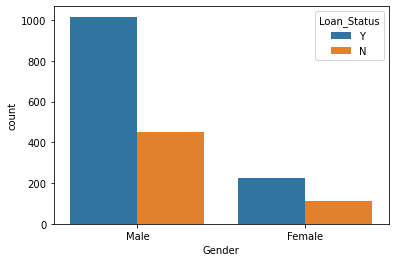

In [8]:
sns.countplot(x='Gender',hue='Loan_Status',data=data)

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

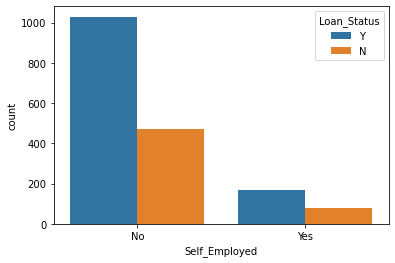

In [9]:
sns.countplot(x='Self_Employed',hue='Loan_Status',data=data)

<AxesSubplot:xlabel='Education', ylabel='count'>

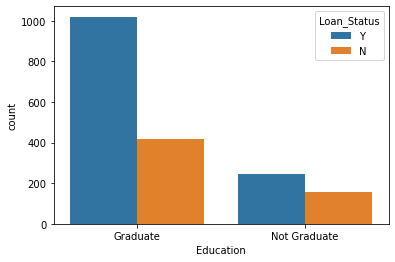

In [10]:
sns.countplot(x='Education',hue='Loan_Status',data=data)

<AxesSubplot:xlabel='Married', ylabel='count'>

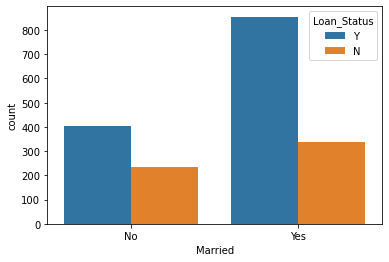

In [11]:
sns.countplot(x='Married',hue='Loan_Status',data=data)

<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

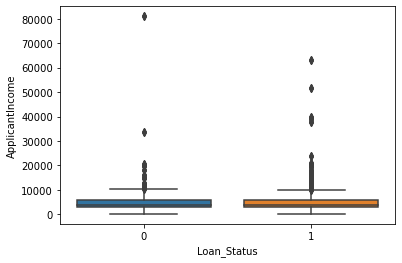

In [54]:
sns.boxplot(x='Loan_Status',y='ApplicantIncome',data=data)

In [13]:
def encoder(x):
    if x=="Male":
        return int(1)
    else:
        return int(0)

In [14]:
data['Gender']= data['Gender'].apply(encoder)

In [15]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
data.isnull().sum()

Loan_ID                0
Gender                 0
Married                9
Dependents            45
Education              0
Self_Employed         96
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            66
Loan_Amount_Term      42
Credit_History       150
Property_Area          0
Loan_Status            0
dtype: int64

In [17]:
def dependents(x):
    if x=='0':
        return int(0)
    elif x=='1':
        return int(1)
    elif x=='2':
        return int(2)
    else:
        return int(3)
    

In [18]:
data['Dependents']=data['Dependents'].apply(dependents)

In [19]:
data['Gender'].fillna("Female",inplace=True)
data['Married'].fillna("yes",inplace=True)
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].median())
data['Self_Employed'].fillna('no',inplace=True)
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].median())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].median())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].median())

In [20]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['Married']=labelencoder.fit_transform(data['Married'])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,1,1,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,1,1,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,1,0,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1836,LP004208,1,1,0,Graduate,No,3232,1950.0,108.0,360.0,1.0,Rural,Y
1837,LP004209,0,0,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
1838,LP004210,1,1,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
1839,LP004211,1,1,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y


In [22]:
data['Education']=labelencoder.fit_transform(data['Education'])


In [23]:
data['Self_Employed']=labelencoder.fit_transform(data['Self_Employed'])


In [24]:
data['Property_Area']=labelencoder.fit_transform(data['Property_Area'])


In [25]:
data['Loan_Status']=labelencoder.fit_transform(data['Loan_Status'])


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1841 entries, 0 to 1840
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            1841 non-null   object 
 1   Gender             1841 non-null   int64  
 2   Married            1841 non-null   int32  
 3   Dependents         1841 non-null   int64  
 4   Education          1841 non-null   int32  
 5   Self_Employed      1841 non-null   int32  
 6   ApplicantIncome    1841 non-null   int64  
 7   CoapplicantIncome  1841 non-null   float64
 8   LoanAmount         1841 non-null   float64
 9   Loan_Amount_Term   1841 non-null   float64
 10  Credit_History     1841 non-null   float64
 11  Property_Area      1841 non-null   int32  
 12  Loan_Status        1841 non-null   int32  
dtypes: float64(4), int32(5), int64(3), object(1)
memory usage: 151.1+ KB


In [27]:
data.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,LP001013,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,LP001014,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,LP001018,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,LP001020,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0


In [28]:
data=data.drop(['Loan_ID'],axis=1)

In [29]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [30]:
cor=data.corr()
print (cor)

                     Gender   Married  Dependents  Education  Self_Employed  \
Gender             1.000000  0.326650    0.141320   0.060999      -0.038476   
Married            0.326650  1.000000    0.344381   0.006373      -0.037140   
Dependents         0.141320  0.344381    1.000000   0.060972       0.011052   
Education          0.060999  0.006373    0.060972   1.000000      -0.020733   
Self_Employed     -0.038476 -0.037140    0.011052  -0.020733       1.000000   
ApplicantIncome    0.013804  0.052046    0.110035  -0.140810       0.095822   
CoapplicantIncome  0.081814  0.069509    0.015845  -0.062459       0.052682   
LoanAmount         0.063149  0.144259    0.140886  -0.168816       0.090054   
Loan_Amount_Term  -0.070070 -0.096216   -0.084172  -0.073857      -0.036594   
Credit_History     0.019054  0.013132   -0.076388  -0.074480       0.064039   
Property_Area     -0.017123  0.007941    0.025757  -0.065262      -0.013410   
Loan_Status        0.023854  0.095669   -0.004015  -

<AxesSubplot:>

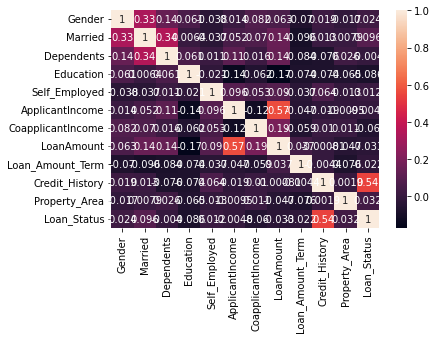

In [31]:
sns.heatmap(cor,annot=True)

In [32]:
Y=data['Loan_Status']
X=data.drop('Loan_Status',axis=1)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=40)

In [34]:
model=LogisticRegression()

In [35]:
model.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
Y_pred=model.predict(X_test)
Y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred)

0.8184281842818428

In [38]:
model_0= DecisionTreeClassifier()

In [39]:
model_0.fit(X_train,Y_train)

DecisionTreeClassifier()

In [40]:
model_0.predict(X_test)

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,

In [41]:
Y_pred_0=model_0.predict(X_test)
Y_pred_0

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,

In [42]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred_0)

0.975609756097561

In [43]:
model_1= RandomForestClassifier()

In [44]:
model_1.fit(X_train,Y_train)

RandomForestClassifier()

In [45]:
model_1.predict(X_test)

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,

In [46]:
Y_pred_1=model_1.predict(X_test)
Y_pred_1

array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,

In [47]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test, Y_pred_1)

0.983739837398374

In [48]:
import pickle 
Pkl_Filename = "loan.pkl"  
pickle.dump(model_1, open(Pkl_Filename, 'wb'))

In [49]:
with open(Pkl_Filename, 'rb') as file:  
    Pickled_RF_Model = pickle.load(file)

Pickled_RF_Model

RandomForestClassifier()

In [50]:
score = Pickled_RF_Model.score(X_test, Y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

Test score: 98.37 %
